PROJECT 2023 - ΠΟΥΡΝΑΡΑΣ ΑΓΓΕΛΟΣ 1057739 - ΒΑΣΙΛΗΣ ΓΚΑΓΚΑΡΗΣ 1047388

Αναφορά Ανάλυσης Δεδομένων

Εισαγωγή

Στην αρχή της ανάλυσης μας εστιάσαμε στη επεξεργασια του συνολου των δεδομένων και στη δημιουργία γραφικών παραστάσεων για την κατανόηση του συνόλου δεδομένων . Πιο συγκεκριμένα  :
1) Εισαγωγη του dataset 
2) Εξαγωγη βάσικών πληροφοριών μέσω μετρικών
3) Ανίχνευση αρνητικών και ελλειπών τιμών στις στήλες 
4) Εύρεση συσχετίσεων μεταξύ των στηλών


In [977]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
data = pd.read_csv('data.csv')


In [978]:
data

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


In [979]:
data_1 = data.copy()

In [980]:
data.columns

Index(['Entity', 'Continent', 'Latitude', 'Longitude',
       'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)', 'Date', 'Daily tests',
       'Cases', 'Deaths'],
      dtype='object')

In [981]:
basic_data_info = data.describe()
basic_data_info

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [982]:
data_dimension = data.shape
data_dimension

(38472, 15)

In [983]:
data_daily_tests = data['Daily tests']
data_daily_tests

0           8.0
1           5.0
2           4.0
3           1.0
4           8.0
          ...  
38467    1804.0
38468    2965.0
38469       NaN
38470       NaN
38471       NaN
Name: Daily tests, Length: 38472, dtype: float64

In [984]:
data.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

Παρατήρουμε λοιπόν πως έχουμε ελλειπείς τιμές μόνο στις στήλες Daily tests Cases και Deaths.

Υπολογίζουμε τα ποσόστα των ελλειπών τιμών στα συνολικά δεδομένα της κάθε στήλης.

Daily tests = (7895/38472)% = 20.52 %
Deaths = (3610/38472)% = 9.38 %
Cases = (254/38472)% = 0.66 %

Σε αυτό το σημέιο είναι κρίσιμο να αναλύσουμε την προσέγγιση μας για την αντικατάσταση των ελλειπών τιμών.

Οι μέθοδοι που σκεφτήκαμε και δοκιμάσαμε για να γεμίσουμε τις ελλειπείς τιμές είναι οι ακόλουθες: 

Α) Χρήση μέσης τιμής για τα Cases επειδή το ποσοστό είναι χαμηλό = 0.66 % οπότε θεωρούμε πως δε θα δημιουργήσει πρόβλημα στη σύγκλιση ενός έγκυρου αποτελέσματος. 
Β) Για τις στήλες Deaths και Daily tests σκεφτήκαμε πως η χρήση μέσης τιμής θα δημιουργήσει πρόβλημα τα δεδομένα μας καθώς το ποσοστό των ελλειπών τιμών είναι σχετικά μεγάλο. Οπότε οδηγηθήκαμε στη ευρέση άλλων μεθόδων για την αντικατάσταση των ελλειπών τιμών στις στήλες αυτές. 
    Ι) Σκεφτήκαμε να προβλέψουμε τις ελλειπείς τιμές με τη χρήση μοντέλων πρόβλεψης όπως LinearRegression, PolynomialRegression. Υλοποιώντας αυτά τα μοντέλα ενώ είχαμε σχετικά καλό R-squared που σημαίνει πως το μοντέλο ταίριαξε στο μοτίβο των δεδομένων ωστόσο στα predictions που έγιναν είχαμε αρνητικές τιμές που με βάση το dataset στα Daily tests και Deaths δεν υπάρχουν αρνητικές τιμές και εάν υπάρξουν είναι λάθος και πρέπει να γίνουν drop. Αυτό μπορεί να οφείλεται ενδεχομένως στην κανονικόποιηση των δεδομένων που κάναμε. Επίσης θεωρητικά με βάση τα features που επιλέξαμε για το train υπάρχει υψηλή συσχέτιση οπότε το μοντέλο θα κάνει καλή πρόβλεψη. Έτσι επειδή τα αποτελέσματα που εξήγαμε δε μας ικανοποίησαν συνεχίσαμε στην εύρεση άλλων μεθόδων ελλειπών τιμών.
    ΙΙ) Επειδή το dataset είναι time series καταλήξαμε πως καλή προσέγγιση για την αντικατάσταση των ελλειπών τιμών είναι με backward/forward μέθοδο. Η λογική που ακολουθούν αυτές οι μέθοδοι μας καλύπτουν επομένως γεμίσαμε εν τέλω τις ελλειπές τιμές με την backward μέθοδο.

In [985]:
# Find if there are negative values 
count = 0 
for column in data.columns:
    for  index, value in data[column].iteritems():
        if isinstance(value, (int, float)) and value < 0:
            count += 1
    print(column, count)
    count = 0  


Entity 0
Continent 0
Latitude 7191
Longitude 10287
Average temperature per year 795
Hospital beds per 1000 people 0
Medical doctors per 1000 people 0
GDP/Capita 0
Population 0
Median age 0
Population aged 65 and over (%) 0
Date 0
Daily tests 12
Cases 0
Deaths 0


Βλέπουμε ότι στα Daily tests έχουμε 12 ελλειπής τιμές που θα τις κάνουμε drop. 

In [986]:
corr = data.corr()
corr

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
Latitude,1.000000,0.022212,-0.567321,0.455026,0.516162,0.415517,-0.021433,0.604999,0.542527,0.111004,0.046270,0.060524
Longitude,0.022212,1.000000,0.007620,0.203363,-0.094238,-0.040357,0.135531,0.015003,-0.056834,-0.054170,-0.102084,-0.184717
Average temperature per year,-0.567321,0.007620,1.000000,-0.585767,-0.586570,-0.478416,0.114627,-0.620682,-0.705350,-0.109813,-0.062218,-0.095248
Hospital beds per 1000 people,0.455026,0.203363,-0.585767,1.000000,0.591556,0.245986,-0.122703,0.684914,0.657850,0.001291,-0.019718,-0.031872
Medical doctors per 1000 people,0.516162,-0.094238,-0.586570,0.591556,1.000000,0.523766,-0.153440,0.766323,0.734890,0.050166,0.019062,0.040100
GDP/Capita,0.415517,-0.040357,-0.478416,0.245986,0.523766,1.000000,-0.096007,0.541829,0.508596,0.141016,0.101620,0.130679
Population,-0.021433,0.135531,0.114627,-0.122703,-0.153440,-0.096007,1.000000,-0.093417,-0.094293,0.550607,0.416840,0.395529
Median age,0.604999,0.015003,-0.620682,0.684914,0.766323,0.541829,-0.093417,1.000000,0.906709,0.082133,0.048298,0.075701
Population aged 65 and over (%),0.542527,-0.056834,-0.705350,0.657850,0.734890,0.508596,-0.094293,0.906709,1.000000,0.078532,0.051688,0.084453
Daily tests,0.111004,-0.054170,-0.109813,0.001291,0.050166,0.141016,0.550607,0.082133,0.078532,1.000000,0.838157,0.821268


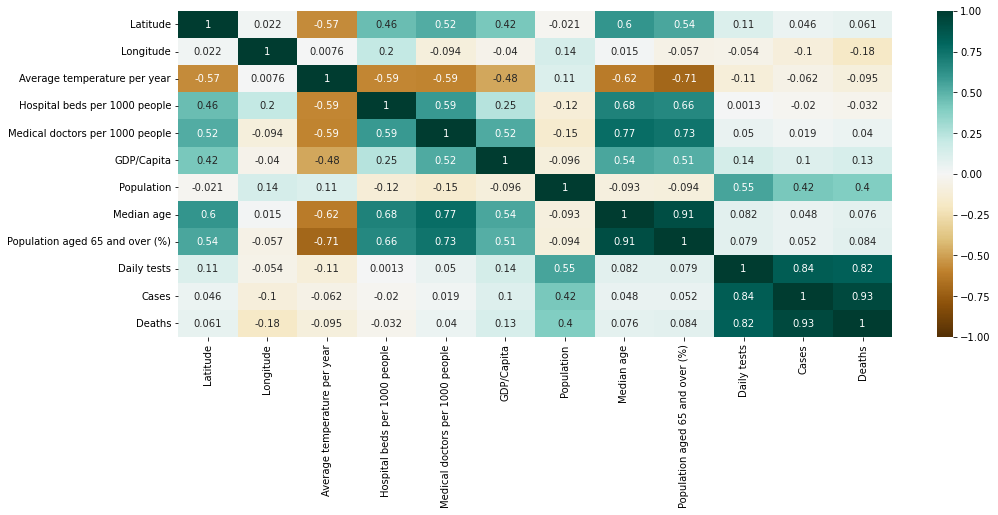

In [987]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')

Παρατηρούμε υψήλη συσχέτιση μεταξύ των στηλών Daily tests Cases και Deaths που είναι αναμενόμενο. 'Έπισης παρατηρούμε σχετικά υψηλή μεταξύ των στηλών Median Age Medical doctors per 1000 people ΚΑΙ Population Aged 65 and over (%) Medical doctors per 1000 people. Αυτές οι συσχετίσεις μας οδηγούν στο συμπέρασμα πως υπάρχει αναλογία μεταξύ τους. Τέλος δεν παρατηρούμε αρνητικά συσχετιζόμενες στήλες δηλαδή τα δεδομένα να έχουν μία αντιστρόφως ανάλογη σχέση.

In [988]:
data.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [989]:
data.dtypes

Entity                              object
Continent                           object
Latitude                           float64
Longitude                          float64
Average temperature per year         int64
Hospital beds per 1000 people      float64
Medical doctors per 1000 people    float64
GDP/Capita                         float64
Population                           int64
Median age                           int64
Population aged 65 and over (%)      int64
Date                                object
Daily tests                        float64
Cases                              float64
Deaths                             float64
dtype: object

In [990]:
data_new = data 
data_new

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


In [991]:
data_new

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


In [992]:
data_new['Date'] = pd.to_datetime(data['Date'])

In [993]:
data_new.dtypes

Entity                                     object
Continent                                  object
Latitude                                  float64
Longitude                                 float64
Average temperature per year                int64
Hospital beds per 1000 people             float64
Medical doctors per 1000 people           float64
GDP/Capita                                float64
Population                                  int64
Median age                                  int64
Population aged 65 and over (%)             int64
Date                               datetime64[ns]
Daily tests                               float64
Cases                                     float64
Deaths                                    float64
dtype: object

In [994]:
sub_data_new = data_new
sub_data_new


,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


In [995]:
# Prepare to visualize the Daily tests Deaths and Cases during the year
# Need to change the form of Daily tests data and change them to cumulative tests = Daily tests 
sub_data_new['Daily tests'] = sub_data_new.groupby('Entity')['Daily tests'].cumsum()
sub_data_new = sub_data_new.groupby('Date').agg({'Cases':'sum','Deaths':'sum','Daily tests':'sum'})
sub_data_new


,Cases,Deaths,Daily tests
Date,,,
2020-01-01,0.0,0.0,29.0
2020-01-02,0.0,0.0,144.0
2020-01-03,0.0,0.0,237.0
2020-01-04,0.0,0.0,301.0
2020-01-05,0.0,0.0,394.0
...,...,...,...
2021-02-24,91575779.0,2015994.0,567055169.0
2021-02-25,91902687.0,2023612.0,425962772.0
2021-02-26,92205008.0,2030685.0,67826692.0


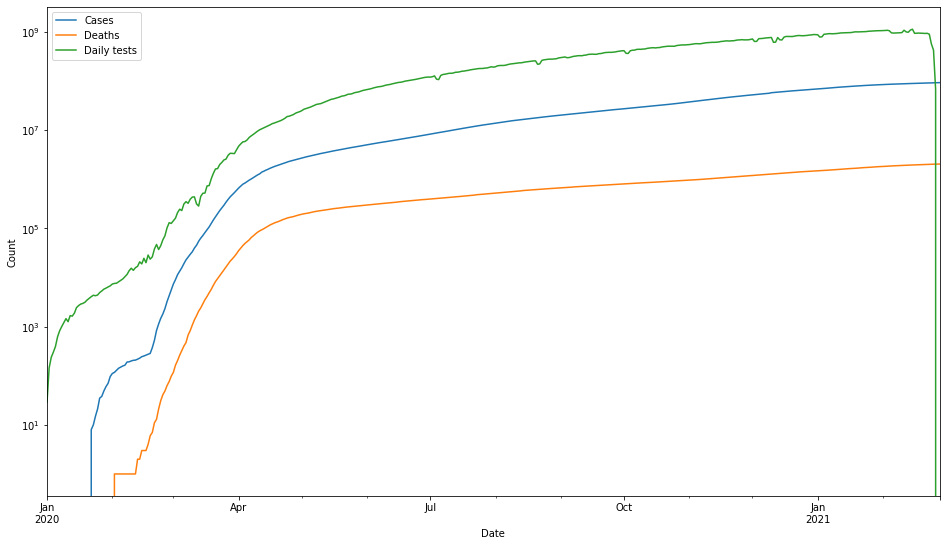

In [996]:
plt.figure(figsize=(16,9))
sub_data_new['Cases'].plot()
sub_data_new['Deaths'].plot()
sub_data_new['Daily tests'].plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.yscale('log')  
plt.legend()
plt.show()

Παρατήρομουμε πως υπάρχει συνεχής αύξηση των τιμών στις στήλες Cases Daily tests και Deaths και επιβεβαιώνεται για άκομη μια φορά η υψηλή συσχέτιση αυτών των στηλών μεταξύ τους 

In [997]:
data.count()

Entity                             38472
Continent                          38472
Latitude                           38472
Longitude                          38472
Average temperature per year       38472
Hospital beds per 1000 people      38472
Medical doctors per 1000 people    38472
GDP/Capita                         38472
Population                         38472
Median age                         38472
Population aged 65 and over (%)    38472
Date                               38472
Daily tests                        30577
Cases                              38218
Deaths                             34862
dtype: int64

In [998]:
data.isnull().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

In [999]:
# Try the first approach with fill the missing values with mean
data['Cases'].fillna(int(data['Cases'].mean()), inplace=True)  

In [1000]:
data

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,287902.0,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,13.0,287902.0,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,17.0,287902.0,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,18.0,287902.0,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,26.0,287902.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,364666.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,367631.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


In [1001]:
data.columns

Index(['Entity', 'Continent', 'Latitude', 'Longitude',
       'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)', 'Date', 'Daily tests',
       'Cases', 'Deaths'],
      dtype='object')

In [1002]:
# fill the Deaths with mean to use model to predict the missing values for Daily tests
data['Deaths'].fillna(data['Deaths'].mean(),inplace=True)
data

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,287902.0,8090.504733
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,13.0,287902.0,8090.504733
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,17.0,287902.0,8090.504733
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,18.0,287902.0,8090.504733
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,26.0,287902.0,8090.504733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,364666.0,35960.0,1456.000000
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,367631.0,35994.0,1458.000000
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.000000
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.000000


In [1003]:
data.isna().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                                 0
Deaths                                0
dtype: int64

In [1004]:
data_with_non_missing_values = data.copy()
data_with_non_missing_values

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,287902.0,8090.504733
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,13.0,287902.0,8090.504733
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,17.0,287902.0,8090.504733
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,18.0,287902.0,8090.504733
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,26.0,287902.0,8090.504733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,364666.0,35960.0,1456.000000
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,367631.0,35994.0,1458.000000
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.000000
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.000000


In [1005]:
data_with_non_missing_values.dropna(subset=['Daily tests'], inplace=True)

In [1006]:
# Start create our model 
data_with_non_missing_values = data_with_non_missing_values.drop(['Entity','Continent','Longitude','Latitude','Date','Average temperature per year','Hospital beds per 1000 people','Medical doctors per 1000 people','GDP/Capita','Median age','Population aged 65 and over (%)','Population'], axis=1)
data_with_non_missing_values

,Daily tests,Cases,Deaths
0,8.0,287902.0,8090.504733
1,13.0,287902.0,8090.504733
2,17.0,287902.0,8090.504733
3,18.0,287902.0,8090.504733
4,26.0,287902.0,8090.504733
...,...,...,...
38464,359346.0,35796.0,1436.000000
38465,360989.0,35862.0,1441.000000
38466,362862.0,35910.0,1448.000000
38467,364666.0,35960.0,1456.000000


In [1007]:
X = data_with_non_missing_values.drop(['Daily tests'], axis=1)
X

,Cases,Deaths
0,287902.0,8090.504733
1,287902.0,8090.504733
2,287902.0,8090.504733
3,287902.0,8090.504733
4,287902.0,8090.504733
...,...,...
38464,35796.0,1436.000000
38465,35862.0,1441.000000
38466,35910.0,1448.000000
38467,35960.0,1456.000000


In [1008]:
y = data_with_non_missing_values['Daily tests']
y

0             8.0
1            13.0
2            17.0
3            18.0
4            26.0
           ...   
38464    359346.0
38465    360989.0
38466    362862.0
38467    364666.0
38468    367631.0
Name: Daily tests, Length: 30577, dtype: float64

In [1009]:
data_with_non_missing_values.dtypes

Daily tests    float64
Cases          float64
Deaths         float64
dtype: object

In [1010]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scale our data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train,y_train)


LinearRegression()

In [1011]:
r_squared_test = model.score(X_test, y_test)
print("R-squared on testing data:", r_squared_test)


R-squared on testing data: 0.9207746550252495


In [1012]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(X_train)


X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)


model = LinearRegression().fit(X_train, y_train)

# Evaluate the model 
r_squared_test = model.score(X_test, y_test)
print("R-squared on testing data:", r_squared_test)


R-squared on testing data: 0.9424197499821084


In [1013]:
data

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,287902.0,8090.504733
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,13.0,287902.0,8090.504733
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,17.0,287902.0,8090.504733
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,18.0,287902.0,8090.504733
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,26.0,287902.0,8090.504733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,364666.0,35960.0,1456.000000
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,367631.0,35994.0,1458.000000
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.000000
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.000000


In [1014]:
missing_values = data.copy()
missing_values

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,287902.0,8090.504733
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,13.0,287902.0,8090.504733
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,17.0,287902.0,8090.504733
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,18.0,287902.0,8090.504733
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,26.0,287902.0,8090.504733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,364666.0,35960.0,1456.000000
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,367631.0,35994.0,1458.000000
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.000000
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.000000


In [1015]:
missing_values = missing_values.drop(['Entity','Continent','Longitude','Latitude','Date','Average temperature per year','Hospital beds per 1000 people','Medical doctors per 1000 people','GDP/Capita','Median age','Population aged 65 and over (%)','Population'], axis=1)


In [1016]:
missing_values = missing_values[missing_values['Daily tests'].isna()]
missing_values

,Daily tests,Cases,Deaths
27,NaN,104.0,4.0
28,NaN,123.0,5.0
348,NaN,85336.0,1460.0
356,NaN,93850.0,1567.0
367,NaN,105229.0,1756.0
...,...,...,...
38295,NaN,6837.0,206.0
38296,NaN,6837.0,206.0
38469,NaN,36044.0,1463.0
38470,NaN,36058.0,1463.0


In [1017]:
missing_values = missing_values.drop(['Daily tests'], axis=1)

In [1018]:
data.columns

Index(['Entity', 'Continent', 'Latitude', 'Longitude',
       'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)', 'Date', 'Daily tests',
       'Cases', 'Deaths'],
      dtype='object')

In [1019]:
data['Date'] = pd.to_datetime(data['Date'])

In [1020]:
data['Date']

0       2020-02-25
1       2020-02-26
2       2020-02-27
3       2020-02-28
4       2020-02-29
           ...    
38467   2021-02-24
38468   2021-02-25
38469   2021-02-26
38470   2021-02-27
38471   2021-02-28
Name: Date, Length: 38472, dtype: datetime64[ns]

In [1021]:
data['Date'] = pd.to_datetime(data['Date'])

Για το ερώτημα της συσταδοποίησης επιλέξαμε δύο αλγορίθμους που υλοποιήσαμε για την ομαδοποίηση των χωρών που είχαν παρόμοια συμπεριφορά στην αντιμετώπιση του covid.

Οι δύο αλγόριθμοι είναι :
A) Kmeans
B) DBSCAN

Τα features που επιλέξαμε είναι το Positivy rate , Fatality rate και Cumulative tests per Population. Τα Daily tests ήταν απαραίτητο να μετασχηματιστούν ώστε να μπορέσουμε να τα μελετήσουμε παρόμοια όπως τα Deaths και Cases ώστε οι αλγόριθμοι να έχουν καλύτερη ακρίβεια.

In [1022]:
data

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,287902.0,8090.504733
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,13.0,287902.0,8090.504733
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,17.0,287902.0,8090.504733
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,18.0,287902.0,8090.504733
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,26.0,287902.0,8090.504733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,364666.0,35960.0,1456.000000
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,367631.0,35994.0,1458.000000
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.000000
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.000000


In [1023]:
data_clustering = data_1.copy()

In [1024]:
data_clustering.isna().sum()

Entity                                0
Continent                             0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP/Capita                            0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

In [1025]:
# At last fill the missing values with backward method for all the columns with missing values. In our Cases for Daily tests, Deaths, Cases
data_clustering['Deaths'].fillna(method='bfill',inplace=True)
data_clustering['Daily tests'].fillna(method='bfill',inplace=True)
data_clustering['Cases'].fillna(method='bfill',inplace=True)
data_clustering

data_clustering.isna().sum()



Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        3
Cases                              0
Deaths                             0
dtype: int64

Οι ελλειπείς τιμές που προκύπτουν είναι των τριών τελευταιών στήλων και επείδη η μέθοδος backward γέμιζει τις ελλειπείς τιμές με βάση την πιο πρόσφατη επόμενη τιμή που θα βρει στην προκειμένη περίπτωση δε βρίσκει και για αυτό υπάρχουν ακόμα ελλειπείς τιμές ακόμα και μετά τη χρήση της backward μεθόδου. Επιλέξαμε να κάνουμε drop τις ελλειπείς τιμές αυτές καθώς είναι ελάχιστες συγκριτικά με τα συνολικά δεδομένα.

In [1026]:
# Drop the missing values of Daily tests 
data_clustering.dropna(subset=['Daily tests'],inplace=True)


In [1027]:
# Make sure there are no missing values in our dataset and everything worked fine
data_clustering.isna().sum() 

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        0
Cases                              0
Deaths                             0
dtype: int64

In [1028]:
data_clustering.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,2.0,1.0
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,2.0,1.0
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,2.0,1.0
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,2.0,1.0
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,2.0,1.0


In [1029]:
# For clustering we drop uunnecessary columns 
data_clustering = data_clustering.drop(['Longitude','Latitude','Continent','Average temperature per year','Hospital beds per 1000 people','Medical doctors per 1000 people','GDP/Capita','Median age','Population aged 65 and over (%)','Date'], axis=1)

In [1030]:
import pandas as pd


data_clustering['Daily tests'] = pd.to_numeric(data_clustering['Daily tests'], errors='coerce')

# Calculate cumulative tests by entity
data_clustering['Cumulative tests'] = data_clustering.groupby('Entity')['Daily tests'].cumsum()

# Create a new DataFrame with unique entities and their total values
result_grouped_by_entity = data_clustering.groupby('Entity').agg({
    'Cases': 'last',
    'Deaths': 'last',
    'Cumulative tests': 'last',
    'Population': 'last'
})

# Calculate rates
result_grouped_by_entity['Positivity rate'] = (result_grouped_by_entity['Cases'] / result_grouped_by_entity['Cumulative tests']) 
result_grouped_by_entity['Fatality rate'] = (result_grouped_by_entity['Deaths'] / result_grouped_by_entity['Cases']) 
result_grouped_by_entity['Cumulative tests per Population'] = (result_grouped_by_entity['Cumulative tests'] / result_grouped_by_entity['Population']) 

result_grouped_by_entity


,Cases,Deaths,Cumulative tests,Population,Positivity rate,Fatality rate,Cumulative tests per Population
Entity,,,,,,,
Albania,107167.0,1796.0,441147.0,2873457,0.242928,0.016759,0.153525
Algeria,113092.0,2983.0,160388.0,41318142,0.705115,0.026377,0.003882
Argentina,2107365.0,51965.0,6095671.0,44271041,0.345715,0.024659,0.137690
Armenia,172058.0,3192.0,713171.0,2930450,0.241258,0.018552,0.243366
Australia,28978.0,909.0,13873641.0,24598933,0.002089,0.031369,0.563994
...,...,...,...,...,...,...,...
United States,28605669.0,513091.0,328413191.0,325719178,0.087103,0.017937,1.008271
Uruguay,57994.0,608.0,996213.0,3456750,0.058214,0.010484,0.288194
Vietnam,2448.0,35.0,1444921.0,95540800,0.001694,0.014297,0.015124


In [1031]:
result_grouped_by_entity

,Cases,Deaths,Cumulative tests,Population,Positivity rate,Fatality rate,Cumulative tests per Population
Entity,,,,,,,
Albania,107167.0,1796.0,441147.0,2873457,0.242928,0.016759,0.153525
Algeria,113092.0,2983.0,160388.0,41318142,0.705115,0.026377,0.003882
Argentina,2107365.0,51965.0,6095671.0,44271041,0.345715,0.024659,0.137690
Armenia,172058.0,3192.0,713171.0,2930450,0.241258,0.018552,0.243366
Australia,28978.0,909.0,13873641.0,24598933,0.002089,0.031369,0.563994
...,...,...,...,...,...,...,...
United States,28605669.0,513091.0,328413191.0,325719178,0.087103,0.017937,1.008271
Uruguay,57994.0,608.0,996213.0,3456750,0.058214,0.010484,0.288194
Vietnam,2448.0,35.0,1444921.0,95540800,0.001694,0.014297,0.015124


In [1032]:
data_clustering_by_entity = result_grouped_by_entity.copy()
data_clustering_by_entity = data_clustering_by_entity.drop(['Population','Cases','Deaths','Cumulative tests'], axis=1)

In [1033]:
from scipy.stats import zscore

# Detect the outliers 

# Select columns we want to use z-score 
columns = ['Positivity rate', 'Fatality rate', 'Cumulative tests per Population']


# Calculate Z-scores for the selected columns
z_scores = zscore(data_clustering_by_entity[columns])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).any(axis=1)
# Drop rows with outliers
data_clustering_no_outliers = data_clustering_by_entity[~outliers]

# Display the resulting DataFrame without outliers
data_clustering_no_outliers


,Positivity rate,Fatality rate,Cumulative tests per Population
Entity,,,
Albania,0.242928,0.016759,0.153525
Argentina,0.345715,0.024659,0.137690
Armenia,0.241258,0.018552,0.243366
Australia,0.002089,0.031369,0.563994
Austria,0.026892,0.018634,1.939399
...,...,...,...
United States,0.087103,0.017937,1.008271
Uruguay,0.058214,0.010484,0.288194
Vietnam,0.001694,0.014297,0.015124


In [1034]:
data_clustering_by_entity = data_clustering_no_outliers.copy()
data_clustering_by_entity

,Positivity rate,Fatality rate,Cumulative tests per Population
Entity,,,
Albania,0.242928,0.016759,0.153525
Argentina,0.345715,0.024659,0.137690
Armenia,0.241258,0.018552,0.243366
Australia,0.002089,0.031369,0.563994
Austria,0.026892,0.018634,1.939399
...,...,...,...
United States,0.087103,0.017937,1.008271
Uruguay,0.058214,0.010484,0.288194
Vietnam,0.001694,0.014297,0.015124


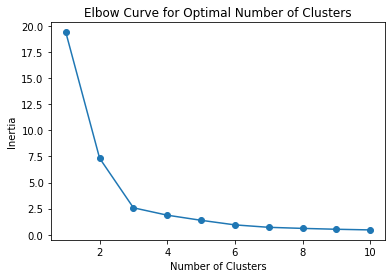

In [1035]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


cluster_numbers = range(1, 11)

inertia_values = []
for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_clustering_by_entity)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_numbers, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [1036]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 0.45562617664687066


In [1037]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(data_clustering_by_entity)

neigh_dist, neigh_ind = nbrs.kneighbors(data_clustering_by_entity)

sort_neigh_dist = np.sort(neigh_dist, axis = 0)

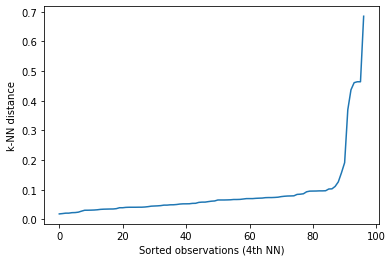

In [1038]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [1039]:
from kneed import KneeLocator

kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)


print(kneedle.knee_y)

0.46094656304269166


In [1040]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps = 0.46, min_samples = 3).fit(data_clustering_by_entity)
clusters.labels_



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1041]:
import pandas as pd
from sklearn.cluster import DBSCAN


clusters = DBSCAN(eps=0.15, min_samples=3).fit(data_clustering_by_entity[['Positivity rate', 'Fatality rate', 'Cumulative tests per Population']])

data_clustering_by_entity['labels_'] = clusters.labels_




In [1042]:
data_clustering_by_entity

,Positivity rate,Fatality rate,Cumulative tests per Population,labels_
Entity,,,,
Albania,0.242928,0.016759,0.153525,0
Argentina,0.345715,0.024659,0.137690,0
Armenia,0.241258,0.018552,0.243366,0
Australia,0.002089,0.031369,0.563994,0
Austria,0.026892,0.018634,1.939399,-1
...,...,...,...,...
United States,0.087103,0.017937,1.008271,-1
Uruguay,0.058214,0.010484,0.288194,0
Vietnam,0.001694,0.014297,0.015124,0


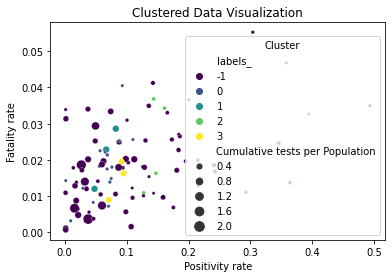

In [1043]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.03, min_samples=3).fit(data_clustering_by_entity)
data_clustering_by_entity['labels_'] = clusters.labels_

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=data_clustering_by_entity,
    x='Positivity rate',
    y='Fatality rate',
    hue='labels_',  
    palette='viridis',
    size='Cumulative tests per Population',
    sizes=(10, 100),
)

# Set labels and title
plt.xlabel('Positivity rate')
plt.ylabel('Fatality rate')
plt.title('Clustered Data Visualization')

plt.legend(title='Cluster')

plt.show()


In [1044]:
import plotly.express as px


data_clustering_by_entity['labels_str'] = data_clustering_by_entity['labels_'].astype(str)

# Scatter plot in 3D
fig = px.scatter_3d(
    data_clustering_by_entity,
    x='Positivity rate',
    y='Fatality rate',
    z='Cumulative tests per Population',
    color="labels_str", 
    size='Cumulative tests per Population',
    opacity=1,
    symbol='labels_str',  
    symbol_sequence=['circle'],  
)

# Set labels and title
fig.update_layout(
    width=1000, height=1000,
    scene=dict(
        xaxis_title='Positivity rate',
        yaxis_title='Fatality rate',
        zaxis_title='Cumulative tests per Population',
    ),
)

fig.show()


### Συμπεράσματα

- Ο *αλγόριθμος K-Means* κατάφερε να ομαδοποιήσει την πλειοψηφία των χωρών σε ένα μόνο σύνολο, αναδεικνύοντας μια κοινή συμπεριφορά μεταξύ τους όσον αφορά τους δείκτες του COVID-19, με ένα σημαντικό ακραίο περιστατικό.
- Ο *DBSCAN* παρείχε μια πιο λεπτομερή άποψη αναγνωρίζοντας ένα σύνολο από εξαιρέσεις, το οποίο θα μπορούσε να αντιπροσωπεύει χώρες με εξαιρετικά υψηλούς ή χαμηλούς ρυθμούς δοκιμών, θετικότητας ή θνησιμότητας, προτείνοντας διαφορετικές αντιδράσεις ή φάσεις της πανδημίας.
- Οι εξαιρέσεις που αναγνωρίστηκαν από τον DBSCAN πιθανότατα αντιπροσωπεύουν χώρες με ακραίες τιμές είτε στους ρυθμούς δοκιμών, θετικότητας είτε θνησιμότητας, υποδηλώνοντας μοναδικές περιστάσεις ή πρακτικές αναφοράς δεδομένων.

Αυτά τα σύνολα μπορούν να βοηθήσουν στην κατανόηση του πώς διαφορετικές χώρες έχουν ανταποκριθεί στην πανδημία, με το Σύνολο 0 (σε και τους δύο αλγορίθμους) να αντιπροσωπεύει μια πιο κοινή προσέγγιση ή φάση στην αντίδραση της πανδημίας, ενώ οι εξαιρέσεις ή το μοναδικό σύνολο στον K-Means μπορεί να απαιτούν περαιτέρω έρευνα για να κατανοηθούν οι λόγοι πίσω από τους ακραίους δείκτες τους.

In [1045]:
data_clustering_by_entity_reset = data_clustering_by_entity.reset_index()

for cluster_label in range(-1, 4):
    cluster_entities = data_clustering_by_entity_reset[data_clustering_by_entity_reset['labels_'] == cluster_label]['Entity']
    print(f"Cluster {cluster_label}:")
    print(cluster_entities)
    print("\n")


Cluster -1:
0            Albania
1          Argentina
2            Armenia
3          Australia
4            Austria
           ...      
88            Turkey
90           Ukraine
91    United Kingdom
92     United States
93           Uruguay
Name: Entity, Length: 71, dtype: object


Cluster 0:
24               Ethiopia
28                  Ghana
41                  Japan
44                  Kenya
53             Mauritania
57                Myanmar
64               Pakistan
68            Philippines
76                Senegal
84               Thailand
85                   Togo
86    Trinidad and Tobago
89                 Uganda
94                Vietnam
95                 Zambia
96               Zimbabwe
Name: Entity, dtype: object


Cluster 1:
8     Belgium
27     France
42     Jordan
Name: Entity, dtype: object


Cluster 2:
35       Iran
47      Libya
58    Namibia
87    Tunisia
Name: Entity, dtype: object


Cluster 3:
23      Estonia
48    Lithuania
82       Sweden
Name: Entity, dtype

In [1046]:
data_greece = data.copy()
data_greece = data_greece[data_greece['Entity'] == 'Greece']

In [1047]:
data_greece = data_greece.reset_index(drop=True)
data_greece

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-26,NaN,1.0,8090.504733
1,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-27,NaN,3.0,8090.504733
2,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-28,NaN,4.0,8090.504733
3,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-02-29,NaN,4.0,8090.504733
4,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2020-03-01,NaN,7.0,8090.504733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2021-02-24,4613839.0,184686.0,6371.000000
365,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2021-02-25,4664086.0,186469.0,6410.000000
366,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2021-02-26,NaN,188201.0,6439.000000
367,Greece,Europe,39.07,21.82,17,4.21,6.26,19582.5,10760421,45,22,2021-02-27,NaN,189831.0,6468.000000


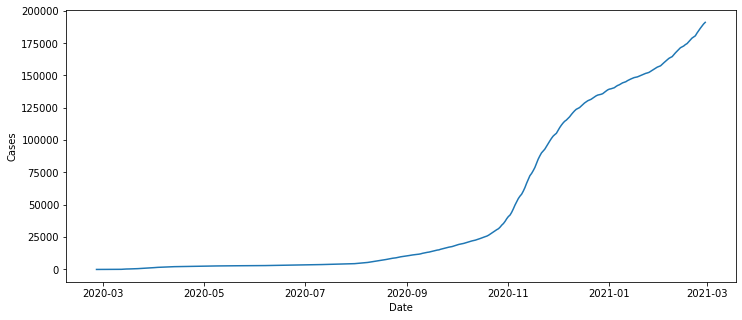

In [1048]:
plt.figure(figsize=(12, 5))
plt.plot(data_greece['Date'], data_greece['Cases'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [1049]:
data_greece.isna().sum()

Entity                              0
Continent                           0
Latitude                            0
Longitude                           0
Average temperature per year        0
Hospital beds per 1000 people       0
Medical doctors per 1000 people     0
GDP/Capita                          0
Population                          0
Median age                          0
Population aged 65 and over (%)     0
Date                                0
Daily tests                        67
Cases                               0
Deaths                              0
dtype: int64

In [1050]:
data_greece['Daily tests'].fillna(method='bfill',inplace=True)
data_greece.isna().sum()

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        3
Cases                              0
Deaths                             0
dtype: int64

In [1051]:
data_greece.isna().sum()

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        3
Cases                              0
Deaths                             0
dtype: int64

In [1052]:
from scipy.stats import zscore

# Select the columns to drop the outliers 
columns = ['Cases', 'Deaths']


# Calculate Z-scores for the selected columns
z_scores = zscore(data_greece[columns])

# Define a threshold for outlier detection 
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).any(axis=1)



# Drop rows with outliers
data_clustering_no_outliers = data_greece[~outliers]


# Display the resulting DataFrame without outliers
data_clustering_no_outliers
data_greece = data_clustering_no_outliers.copy()


In [1053]:
data_greece = data_greece.drop(['Latitude','Longitude','Continent','Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)','Deaths'], axis=1)

In [1054]:
data_greece['Daily tests'] = data_greece['Daily tests'].fillna(1)
data_greece.isna().sum()

Entity         0
Date           0
Daily tests    0
Cases          0
dtype: int64

In [1055]:
data_greece['Date'] = pd.to_datetime(data_greece['Date'])

# Reset index
data_greece = data_greece.reset_index(drop=True)

data_greece.head()

,Entity,Date,Daily tests,Cases
0,Greece,2020-02-26,520.0,1.0
1,Greece,2020-02-27,520.0,3.0
2,Greece,2020-02-28,520.0,4.0
3,Greece,2020-02-29,520.0,4.0
4,Greece,2020-03-01,520.0,7.0


In [1056]:
cases_diff = data_greece['Cases'].diff()
daily_tests_diff = data_greece['Daily tests'].diff()

# Calculate 'Positivity rate' and handle division by zero
data_greece['Positivity rate'] = cases_diff / daily_tests_diff

# Replace inf and NaN values with 0.012
data_greece['Positivity rate'] = data_greece['Positivity rate'].replace({np.inf: 0.012, np.nan: 0.012})

# Reset index
data_greece = data_greece.reset_index(drop=True)

# Display the DataFrame
data_greece.head()


,Entity,Date,Daily tests,Cases,Positivity rate
0,Greece,2020-02-26,520.0,1.0,0.012
1,Greece,2020-02-27,520.0,3.0,0.012
2,Greece,2020-02-28,520.0,4.0,0.012
3,Greece,2020-02-29,520.0,4.0,0.012
4,Greece,2020-03-01,520.0,7.0,0.012


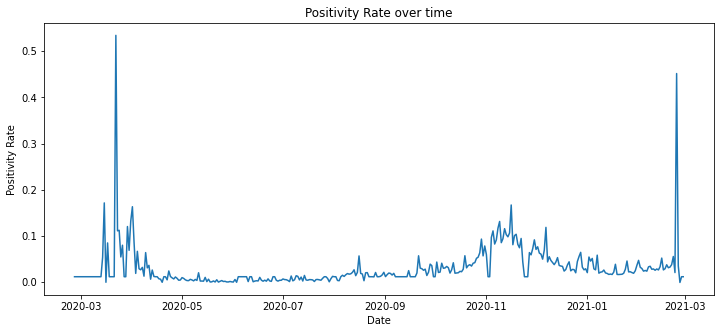

In [1057]:
# Before moving forward with the predictors lets better understand the data
# We will plot the positivity rate over time to check for any trends and seasonality

# Create a matplotlib line plot
plt.figure(figsize=(12, 5))
plt.plot(data_greece['Date'], data_greece['Positivity rate'])
plt.title('Positivity Rate over time')
plt.xlabel('Date')
plt.ylabel('Positivity Rate')
plt.show()


In [1058]:
data_greece = data_greece.drop(['Entity'],axis=1)

In [1059]:
data_greece

,Date,Daily tests,Cases,Positivity rate
0,2020-02-26,520.0,1.0,0.012000
1,2020-02-27,520.0,3.0,0.012000
2,2020-02-28,520.0,4.0,0.012000
3,2020-02-29,520.0,4.0,0.012000
4,2020-03-01,520.0,7.0,0.012000
...,...,...,...,...
364,2021-02-24,4613839.0,184686.0,0.451483
365,2021-02-25,4664086.0,186469.0,0.035485
366,2021-02-26,1.0,188201.0,-0.000371
367,2021-02-27,1.0,189831.0,0.012000


In [1060]:
data_greece.columns

Index(['Date', 'Daily tests', 'Cases', 'Positivity rate'], dtype='object')

In [1061]:
data_greece['Date'] = pd.to_datetime(data_greece['Date'])

data_greece['Date']

data_greece['Timestamp'] = data_greece['Date'].apply(lambda x: x.timestamp())


In [1062]:
start_date = '2020-03-26' 
end_date = '2021-02-23'

data_greece = data_greece[(data_greece['Date'] >= start_date) & (data_greece['Date'] <= end_date)]
data_greece

data_greece = data_greece.reset_index(drop = True)


In [1063]:
data_greece

,Date,Daily tests,Cases,Positivity rate,Timestamp
0,2020-03-26,6349.0,892.0,0.080135,1.585181e+09
1,2020-03-27,6349.0,966.0,0.012000,1.585267e+09
2,2020-03-28,6349.0,1061.0,0.012000,1.585354e+09
3,2020-03-29,7137.0,1156.0,0.120558,1.585440e+09
4,2020-03-30,7947.0,1212.0,0.069136,1.585526e+09
...,...,...,...,...,...
330,2021-02-19,4427022.0,177494.0,0.031433,1.613693e+09
331,2021-02-20,4470332.0,178918.0,0.032879,1.613779e+09
332,2021-02-21,4493471.0,179802.0,0.038204,1.613866e+09
333,2021-02-22,4509081.0,180672.0,0.055734,1.613952e+09


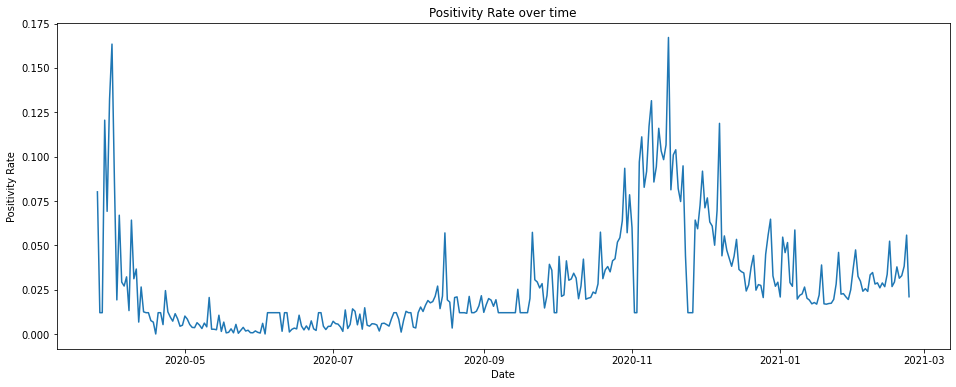

Best Hyperparameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Entire Dataset (MSE): 0.00031566189112495373


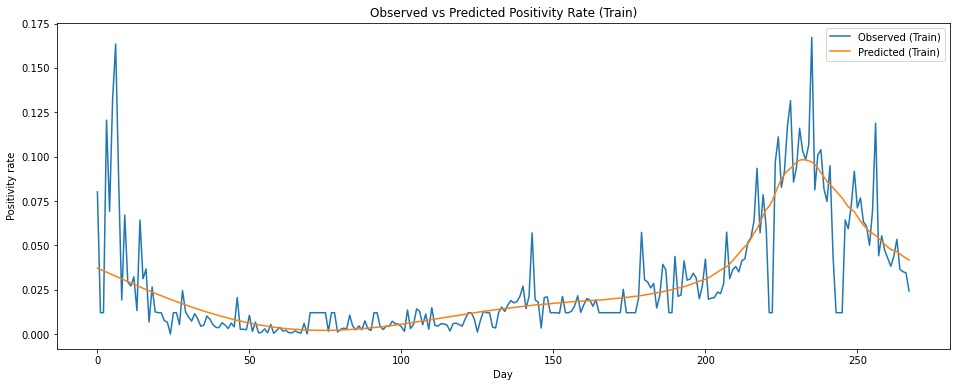

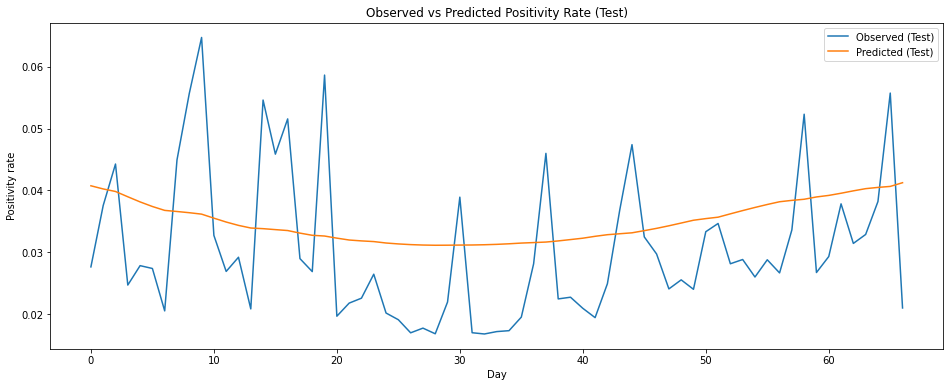

In [1064]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Assuming 'data_greece' is your DataFrame
data_greece['Date'] = pd.to_datetime(data_greece['Date'])
data_greece['Timestamp'] = data_greece['Date'].apply(lambda x: x.timestamp())

start_date = '2020-03-26'
end_date = '2021-02-23'

data_greece = data_greece[(data_greece['Date'] >= start_date) & (data_greece['Date'] <= end_date)]
data_greece = data_greece.reset_index(drop=True)

plt.figure(figsize=(16, 6))
plt.plot(data_greece['Date'], data_greece['Positivity rate'])
plt.title('Positivity Rate over time')
plt.xlabel('Date')
plt.ylabel('Positivity Rate')
plt.show()

# Feature scaling
scaler = StandardScaler()
X = data_greece[['Daily tests', 'Cases', 'Timestamp']]
X_scaled = scaler.fit_transform(X)
y = data_greece['Positivity rate']

# Train-test split
split_index = int(len(data_greece) * 0.8)  # 80% train, 20% test
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Hyperparameter tuning using GridSearchCV
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5]}
grid_search = GridSearchCV(SVR(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create and fit the SVR model with the best hyperparameters
best_model = SVR(**best_params)
best_model_fit = best_model.fit(X_train, y_train)

# Make predictions for the entire dataset
y_predictions = best_model_fit.predict(X_scaled)

# Calculate and print Mean Squared Error (MSE) on the entire dataset
mse = mean_squared_error(y, y_predictions)
print('Mean Squared Error on Entire Dataset (MSE):', mse)

# Plotting in a similar style as the RNN plot
plt.figure(figsize=(16, 6))
plt.plot(y_train, label='Observed (Train)')
plt.plot(y_predictions[:len(y_train)], label='Predicted (Train)')
plt.xlabel('Day')
plt.ylabel('Positivity rate')
plt.legend()
plt.title('Observed vs Predicted Positivity Rate (Train)')
plt.show()

# Plotting for the test set
plt.figure(figsize=(16, 6))
plt.plot(y_test.values, label='Observed (Test)')
plt.plot(y_predictions[len(y_train):], label='Predicted (Test)')
plt.xlabel('Day')
plt.ylabel('Positivity rate')
plt.legend()
plt.title('Observed vs Predicted Positivity Rate (Test)')
plt.show()


Στον τομέα της πρόβλεψης του Positivity rate, το SVR φαίνεται  να κατανοεί τη γενική προσέγγιση του Positivity rate. Ωστόσο, η SVR φαίνεται να μην μπορεί  να αναγνωρίσει απότομες άνοδους στα δεδομένα. Οι περιορισμοί του μοντέλου γίνονται εμφανείς στην ανικανότητά του να διακρίνει αυτές τις απότομες διακυμάνσεις. Παρά τους περιορισμούς αυτούς, η SVM παραμένει μια αξιόπιστη επιλογή για εφαρμογές όπου μια κατανοητική, αν και λιγότερο λεπτομερής, κατανόηση της συμπεριφοράς των δεδομένων είναι αρκετή.



2 / 2




RNN


In [1065]:
import torch
data_greece_rnn = data_greece.copy()

In [1066]:
data_greece_rnn.columns

Index(['Date', 'Daily tests', 'Cases', 'Positivity rate', 'Timestamp'], dtype='object')

In [1067]:
# Drop unnecessary columns
data_greece_rnn = data_greece_rnn.drop(['Daily tests','Cases','Timestamp'], axis=1)

In [1068]:
# Find if there are any missing values
data_greece_rnn.isna().sum()

Date               0
Positivity rate    0
dtype: int64

In [1069]:
# We first create a function that takes two arguments as input (dataset and the lookback) which lookback declare how many previous date we want to include in our memory 
# We used lookback=7 we can change it to 3 because we want to predict 3 days. Logically will be more accurate  

from copy import deepcopy as dc 

def prepare_df_for_lstm(data_greece_rnn, n_steps):
    data_greece_rnn = dc(data_greece_rnn)
    data_greece_rnn.set_index('Date', inplace=True)

    for i in range(1, n_steps + 1):
        data_greece_rnn[f'Positivity rate(t-{i})'] = data_greece_rnn['Positivity rate'].shift(i)
    
    data_greece_rnn.dropna(inplace=True)
    return data_greece_rnn


lookback = 7
shifted_data_greece_rnn = prepare_df_for_lstm(data_greece_rnn, lookback)
shifted_data_greece_rnn

,Positivity rate,Positivity rate(t-1),Positivity rate(t-2),Positivity rate(t-3),Positivity rate(t-4),Positivity rate(t-5),Positivity rate(t-6),Positivity rate(t-7)
Date,,,,,,,,
2020-04-02,0.086345,0.163430,0.132296,0.069136,0.120558,0.012000,0.012000,0.080135
2020-04-03,0.019204,0.086345,0.163430,0.132296,0.069136,0.120558,0.012000,0.012000
2020-04-04,0.066964,0.019204,0.086345,0.163430,0.132296,0.069136,0.120558,0.012000
2020-04-05,0.029245,0.066964,0.019204,0.086345,0.163430,0.132296,0.069136,0.120558
2020-04-06,0.027027,0.029245,0.066964,0.019204,0.086345,0.163430,0.132296,0.069136
...,...,...,...,...,...,...,...,...
2021-02-19,0.031433,0.037829,0.029311,0.026727,0.052315,0.033614,0.026662,0.028786
2021-02-20,0.032879,0.031433,0.037829,0.029311,0.026727,0.052315,0.033614,0.026662
2021-02-21,0.038204,0.032879,0.031433,0.037829,0.029311,0.026727,0.052315,0.033614


In [1070]:
# Need to transofrm into array for our rnn work
shifted_data_greece_rnn = shifted_data_greece_rnn.to_numpy()
shifted_data_greece_rnn

array([[0.08634538, 0.16343042, 0.13229572, ..., 0.012     , 0.012     ,
        0.08013544],
       [0.01920401, 0.08634538, 0.16343042, ..., 0.12055838, 0.012     ,
        0.012     ],
       [0.06696429, 0.01920401, 0.08634538, ..., 0.0691358 , 0.12055838,
        0.012     ],
       ...,
       [0.0382039 , 0.03287924, 0.03143276, ..., 0.02672699, 0.05231509,
        0.0336143 ],
       [0.0557335 , 0.0382039 , 0.03287924, ..., 0.02931115, 0.02672699,
        0.05231509],
       [0.02099599, 0.0557335 , 0.0382039 , ..., 0.03782864, 0.02931115,
        0.02672699]])

In [1071]:
from sklearn.preprocessing import MinMaxScaler

# Scale our data MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
shifted_data_greece_rnn = scaler.fit_transform(shifted_data_greece_rnn)

shifted_data_greece_rnn

array([[ 0.03300189,  0.95521672,  0.58273351, ..., -0.85643676,
        -0.85643676, -0.04129139],
       [-0.77025087,  0.03300189,  0.95521672, ...,  0.44231258,
        -0.85643676, -0.85643676],
       [-0.19886585, -0.77025087,  0.03300189, ..., -0.17288669,
         0.44231258, -0.85643676],
       ...,
       [-0.54294372, -0.60664578, -0.62395088, ..., -0.68024885,
        -0.37412298, -0.59785187],
       [-0.33322647, -0.54294372, -0.60664578, ..., -0.64933304,
        -0.68024885, -0.37412298],
       [-0.74881228, -0.33322647, -0.54294372, ..., -0.5474332 ,
        -0.64933304, -0.68024885]])

In [1072]:
# Declare X,y the input and the output
X = shifted_data_greece_rnn[:, 1:]
y = shifted_data_greece_rnn[:, 0]

X.shape, y.shape

((328, 7), (328,))

In [1073]:
X = dc(np.flip(X, axis=1))

In [1074]:
# Split our data
split_index = int(len(X)* 0.80)
split_index

262

In [1075]:
# Prepare our data for training and testing
X_train = X[:split_index] 
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((262, 7), (66, 7), (262,), (66,))

In [1076]:
X_train = X_train.reshape((-1,lookback,1))
X_test = X_test.reshape((-1,lookback,1))

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

In [1077]:
#  ensure that the tensor has floating-point for the neural network rnn work
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()



In [1078]:
from torch.utils.data import Dataset
# Create a class and then declare train_dataset and test_dataset taking as arguments X_train,y_train, X_test,y_test additionally 
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]


train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)


In [1079]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1080]:
import torch
from torch import nn
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        out, _ = self.lstm(x,(h0,c0))
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTM(1,4,1)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [1081]:
learning_rate = 0.001
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train_one_epoch():
    model.train(True)
    print(f'Epoch:{epoch+1}')
    running_loss = 0.0 

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0], batch[1]
        output = model(x_batch)
        loss = loss_fn(output, y_batch)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss / 100 
            print('Batch{0},Loss:{1:.3f}'.format(batch_index+1,
                                                 avg_loss_across_batches))
            running_loss = 0.0
    print()

In [1082]:
learning_rate = 0.001
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def validate_one_epoch():
    model.train(False)
    running_loss = 0.0 

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0], batch[1]

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_fn(output, y_batch)
            running_loss += loss.item()
        
    avg_loss_across_batches = running_loss / len(test_loader)
    print('Val Loss: {0: .3f}'.format(avg_loss_across_batches))
    print('********************************************')
    print()


In [1083]:
learning_rate = 0.0001
num_epochs = 1000
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch:1

Val Loss:  0.186
********************************************

Epoch:2

Val Loss:  0.180
********************************************

Epoch:3

Val Loss:  0.173
********************************************

Epoch:4

Val Loss:  0.167
********************************************

Epoch:5

Val Loss:  0.161
********************************************

Epoch:6

Val Loss:  0.156
********************************************

Epoch:7

Val Loss:  0.150
********************************************

Epoch:8

Val Loss:  0.145
********************************************

Epoch:9

Val Loss:  0.140
********************************************

Epoch:10

Val Loss:  0.135
********************************************

Epoch:11

Val Loss:  0.130
********************************************

Epoch:12

Val Loss:  0.125
********************************************

Epoch:13

Val Loss:  0.121
********************************************

Epoch:14

Val Loss:  0.116
*********************************


Val Loss:  0.029
********************************************

Epoch:223

Val Loss:  0.028
********************************************

Epoch:224

Val Loss:  0.029
********************************************

Epoch:225

Val Loss:  0.028
********************************************

Epoch:226

Val Loss:  0.028
********************************************

Epoch:227

Val Loss:  0.028
********************************************

Epoch:228

Val Loss:  0.028
********************************************

Epoch:229

Val Loss:  0.028
********************************************

Epoch:230

Val Loss:  0.028
********************************************

Epoch:231

Val Loss:  0.028
********************************************

Epoch:232

Val Loss:  0.028
********************************************

Epoch:233

Val Loss:  0.027
********************************************

Epoch:234

Val Loss:  0.027
********************************************

Epoch:235

Val Loss:  0.027
********************

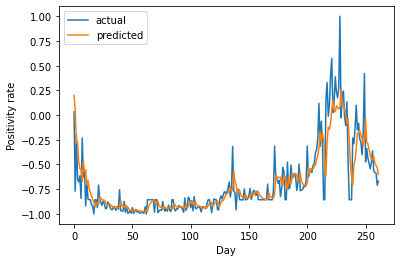

In [1084]:
import matplotlib.pyplot as plt

with torch.no_grad():
    predicted = model(X_train).detach().numpy()

plt.plot(y_train, label='actual')
plt.plot(predicted, label='predicted')  
plt.xlabel('Day')
plt.ylabel('Positivity rate')
plt.legend()
plt.show()


In [1085]:
test_predictions = model(X_test).detach().numpy().flatten()
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:,0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([0.03206602, 0.0349068 , 0.03854188, 0.03213603, 0.03196789,
       0.03082763, 0.02695304, 0.03571253, 0.04326852, 0.05136127,
       0.04259076, 0.03840902, 0.0364779 , 0.03052862, 0.04194686,
       0.04164936, 0.04583827, 0.03869589, 0.03593468, 0.04729236,
       0.03363138, 0.03053841, 0.02813421, 0.02784426, 0.02450866,
       0.02274482, 0.02022994, 0.01961145, 0.01855678, 0.02018585,
       0.02818922, 0.02240115, 0.02148276, 0.02056283, 0.01963383,
       0.01972005, 0.02334824, 0.03273697, 0.02730287, 0.02714974,
       0.02564952, 0.02378149, 0.02472332, 0.0299338 , 0.03682883,
       0.03446259, 0.03390787, 0.03099049, 0.02989933, 0.02782589,
       0.03062371, 0.03196309, 0.03043083, 0.03067173, 0.02939291,
       0.02991314, 0.02885065, 0.03145005, 0.04060495, 0.03352984,
       0.0336154 , 0.03666166, 0.03460106, 0.03467643, 0.03683987,
       0.04507996])

In [1086]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:,0])
new_y_test

array([0.03756559, 0.04426271, 0.02470124, 0.02783815, 0.02738002,
       0.02052425, 0.04492455, 0.05567312, 0.06472271, 0.03272887,
       0.02690275, 0.02919525, 0.0208457 , 0.05460608, 0.04586077,
       0.0515576 , 0.02897237, 0.02687711, 0.05864091, 0.01966646,
       0.02178121, 0.02257966, 0.02645471, 0.02018045, 0.01909663,
       0.01698108, 0.01773856, 0.01682447, 0.02195461, 0.0389086 ,
       0.01699421, 0.01679319, 0.01717875, 0.01732589, 0.01951865,
       0.02813105, 0.0459868 , 0.02246137, 0.02273511, 0.02094349,
       0.01943545, 0.02491851, 0.0367865 , 0.04739671, 0.03248118,
       0.02971883, 0.02407874, 0.02554045, 0.02401372, 0.03332273,
       0.03465183, 0.02814298, 0.02882876, 0.02600287, 0.02878604,
       0.02666201, 0.0336143 , 0.05231509, 0.02672699, 0.02931115,
       0.03782864, 0.03143276, 0.03287924, 0.0382039 , 0.0557335 ,
       0.02099599])

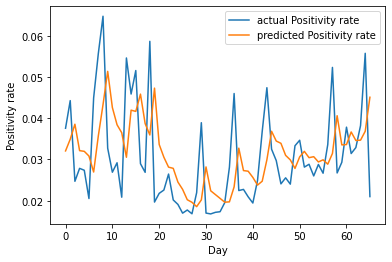

In [1087]:
plt.plot(new_y_test,label='actual Positivity rate')
plt.plot(test_predictions,label='predicted Positivity rate')

plt.xlabel('Day')
plt.ylabel('Positivity rate')
plt.legend()
plt.show()

Το RNN σε αντίθεση με το SVR μπορεί να αναγνωρίσει το γενικότερο μοτίβο που ακολουθούν τα δεδομένα αλλά ακόμα μπορεί και τείνει να ακολουθήσει τις απότομες αυξήσεις στα δεδομένα.Αυτό οφείλεται στο γεγονός πωςς διατηρεί ένα εσωτερικό κρυφό κατάστασης (hidden state) που αποθηκεύει πληροφορίες από προηγούμενα χρονικά βήματα. Αυτό το χαρακτηριστικό του επιτρέπει να "θυμάται" προηγούμενες πληροφορίες και προτείνει πιθανές εκτιμήσεις για τις μελλοντικές τιμές βάσει του προηγούμενου περάσματος του χρόνου. Το RNN μπορεί να αναγνωρίσει αυτές τις αλλαγές λόγω της ικανότητάς του να αντιλαμβάνεται τις διακυμάνσεις στον χρόνο. Η μνήμη του δικτύου επιτρέπει τη διατήρηση πληροφοριών για προηγούμενες τιμές και πατέρν, επιτρέποντάς του να αντιλαμβάνεται την αιτία πίσω από τις ξαφνικές αλλαγές και να προβλέπει τις μελλοντικές τιμές με βάση αυτήν την κατανόηση. 

Τελικές παρατηρήσεις σχετικά με το Project 

Σχετικά με το preprocessing Αναλύσαμε παραπάνω τη σκέψη μας και πως οδηγηθήκαμε να κάνουμε fill τα missing values με τη backward μέθοδο.
Για την ανίχνευση των outliers Μπορούσαμε να χρησιμοποιήσουμμε την IQR μέθοδο ωστόσο επιλέξαμε το z-score επειδή ήταν πιο εύκολο στην υλοποίηση για εμάς. 
Επιλέξαμε να χρησιμοποιήσουμε pytorch αντι για tensorflow καθώς είμαστε παραπάνω εξοικιωμένοι με τη βιβλιοθήκη αυτή. 
Επικεντρωθήκαμε στην ανάλυση του dataset με περισσότερη προσόχη στις 3 κρίσιμες στήλες Deaths,Cases,Daily tests και το ανάλυσαμε απο τη σκόπια των κρουσμάτων και θανάτων και ποσοστού θετικότητας.
Σε μελλοντικές υλοποιήσεις και βελτίωσεις θα θέλαμε να αναλύσουμε περισσότερο το dataset και απο γεωγραφική σκοπιά κρατώντας κάποιες στήλες όπως γεωγραφικό μήκος και πλάτος αλλά ακόμη και απο σκοπιά ηλικίας και ιατρικής περίθαλψης με τις στήλες Median Age, medical doctors per 1000 etc. 